<div style="background-color: #c1f2a5">


# PS11

In this problem set, you are going to implement a model of time discounting in value-based choice.
    
# Instructions

Remember to do your problem set in Python 3. Make sure you fill in any place that says `# YOUR CODE HERE` or "YOUR ANSWER HERE".

Unless we specify otherwise, make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
**Test cases are here to help you debug your code but passing them is not a guarantee that your code is correct.**
    
</div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## Q1. Time discount choice data. 

<div class="alert alert-success">
You will load data from a time discounting experiment and analyze it. In this experiment, participants chose between taking \$20 now vs. accepting an offer of value  \$V after a delay of D days.
    
- `offers` is an n × 2 array, where each row (e.g., `[30., 1.]`) shows an offer V (column 0: `30.`) and a delay D (column 1: `1.`).
- `subjects` is a 1D array of length n, indicating the participant ID in a given row.
- `choices` is an n × 10 array, which contains 10 distinct choices made by the same participant (same ID in `subjects`) in the same condition (same combination of offer V and delay D in `offers`). "1" indicates accepting the delayed offer and "0" indicates taking \$20 now.

Take a look at the data, see how many participants there are, and what the offer values and delay values are.    
    
</div>


In [2]:
# Load experiment data
data = np.load("TimeDiscountExperiment.npz")

In [3]:
# Offers and delays
offers = data["offers"]
print(f"- first 20 offers: [offer   delay]:\n {offers[:42, :]} \n")

# Participant ID in each row
subjects = data["participants"]

# Choices made by participants
choices = data["choices"]
print(f"- first 0 conditions' choices:\n {choices[:10, :]} \n")

# Unique offer values
Vs = np.unique(offers[:, 0])
print(f"- list of unique offer values: {Vs} \n")

# Unique delay values
Ds = np.unique(offers[:, 1])
print(f"- list of unique delay values: {Ds} \n")

# Unique participants
nsubj = len(np.unique(subjects))
print(f"- number of unique subjects: {str(nsubj)}\n")

# Number of iterations per participant per condition + total number of conditions
trialnum = choices.shape
print(f"- each participant has: {str(trialnum[1])} iterations per condition \n")
print(f"- there are  {str(int(trialnum[0] / nsubj))} conditions")

- first 20 offers: [offer   delay]:
 [[ 21.   1.]
 [ 21.   2.]
 [ 21.   5.]
 [ 21.  10.]
 [ 21.  30.]
 [ 21. 100.]
 [ 23.   1.]
 [ 23.   2.]
 [ 23.   5.]
 [ 23.  10.]
 [ 23.  30.]
 [ 23. 100.]
 [ 25.   1.]
 [ 25.   2.]
 [ 25.   5.]
 [ 25.  10.]
 [ 25.  30.]
 [ 25. 100.]
 [ 30.   1.]
 [ 30.   2.]
 [ 30.   5.]
 [ 30.  10.]
 [ 30.  30.]
 [ 30. 100.]
 [ 50.   1.]
 [ 50.   2.]
 [ 50.   5.]
 [ 50.  10.]
 [ 50.  30.]
 [ 50. 100.]
 [100.   1.]
 [100.   2.]
 [100.   5.]
 [100.  10.]
 [100.  30.]
 [100. 100.]
 [ 21.   1.]
 [ 21.   2.]
 [ 21.   5.]
 [ 21.  10.]
 [ 21.  30.]
 [ 21. 100.]] 

- first 0 conditions' choices:
 [[1. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]] 

- list of unique offer values: [ 21.  23.  25.  3

In [4]:
choices[30:36, :]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.]])


## Q1.1. Behavior. [HELP, 5pts]

<div class="alert alert-success">
1. In two subplots of the same figure, plot the overall proportion of delayed choices as a function of a) offer value (on the left) and b) delay value (on the right). Upload your figure in Gradescope as <code>PS11_Q1_1A.png</code>.
    
2. Then in a separate figure, create a heatmap where the x-axis is the offer value V, the y-axis is the delay value D, and colors indicate the proportion of **delay choices** (i.e., accepting the delayed offer). Upload your figure in Gradescope as <code>PS11_Q1_1B.png</code>.
    
For both questions, you **MUST** follow the plotting instructions below to get full credit:    
- Use (10, 5) as your global figure size (`figsize=[10, 5]`)
- Arrange the 2 subplots in one row: the one for offer value on the left and the one for delay value on the right 
- Title each subplot, labels x- and y-axes, and include appropriate x- and y-ticks
- Title the global figure properly 
- Include a color bar in your heatmap (indicating how different shades correspond to high to low quantities)

To see if your results make sense, check whether participants 1) are less likely to accept offers with longer delays and 2) more likely to accept delayed offers of higher values.
</div>


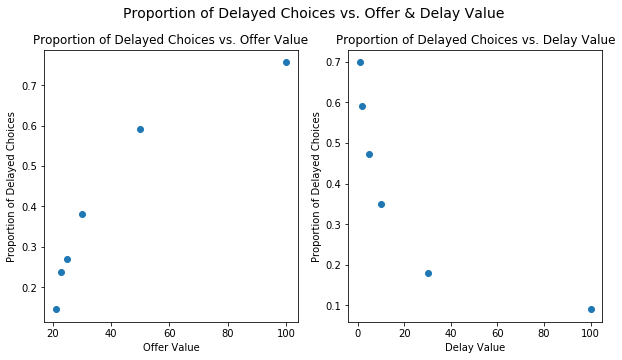

In [20]:
# YOUR CODE HERE
figure, axis = plt.subplots(1, 2, figsize = [10, 5])

figure.suptitle("Proportion of Delayed Choices vs. Offer & Delay Value", y = 1.00, fontsize = 14)

axis_1 = axis[0]

offers_1 = [0,0,0,0,0,0]
offer_count = -1
for i in np.arange(0, len(choices)):
    if i%6 == 0:
        offer_count += 1
        if offer_count == 6:
            offer_count = 0
    offers_1[offer_count] += sum(choices[i])

offers_1 = np.array(offers_1) / 600
axis_1.plot(Vs, offers_1, linestyle = '', marker = 'o')
axis_1.set_xlabel("Offer Value")
axis_1.set_ylabel("Proportion of Delayed Choices")
axis_1.set_title("Proportion of Delayed Choices vs. Offer Value")

axis_2 = axis[1]
delays_1 = [0,0,0,0,0,0]
delay_count = 0
for i in np.arange(0, len(choices)):
    delays_1[delay_count] += sum(choices[i])
    delay_count += 1
    if delay_count == 6:
        delay_count = 0

delays_1 = np.array(delays_1) / 600
axis_2.plot(Ds, delays_1, linestyle = '', marker = 'o')
axis_2.set_xlabel("Delay Value")
axis_2.set_ylabel("Proportion of Delayed Choices")
axis_2.set_title("Proportion of Delayed Choices vs. Delay Value")
figure.savefig("PS11_Q1_1A.png")

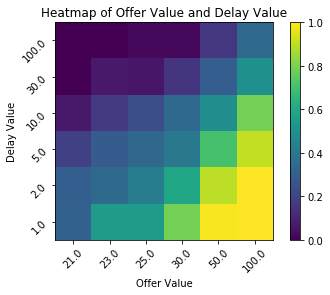

In [35]:
# YOUR CODE HERE
figure, axis = plt.subplots(1, 1)
matrix = np.zeros((6,6))
offer_count = 0
delay_count = -1
for i in np.arange(0, len(choices)):
    delay_count += 1
    if delay_count == 6 and offer_count == 5:
        offer_count = 0
        delay_count = 0
    if delay_count == 6 and offer_count != 5:
        offer_count += 1
        delay_count = 0
    matrix[offer_count][delay_count] += sum(choices[i])

matrix = matrix / 100
im = plt.imshow(matrix.T[::-1])
plt.locator_params(nbins=6)
plt.xticks(np.arange(0, 6), Vs, rotation=45, fontsize = 10)
plt.yticks(np.arange(0, 6), Ds[::-1], rotation=45, fontsize = 10)
plt.xlabel("Offer Value")
plt.ylabel("Delay Value")
plt.title("Heatmap of Offer Value and Delay Value")
plt.colorbar(im)
figure.savefig("PS11_Q1_1B.png")

## Q1.2. Individual differences. [SOLO, 5pts]

<div class="alert alert-success">
    
Different participants can behave very differently in this type of experiment, so let's look at each person individually. 
    
In 10 subplots (one per participant) of the same figure, plot each participant's behavior as a heatmap where the x-axis is the delay value D, the y-axis is the offer value V, and the colors indicate the probability of accepting the delayed offer given V and D, $P(delay|V,D)$. 
    
You will want to create an `individual_behavior` list for each of the 10 participants, where each element is a 6 × 6 array that contains each participant's $P(delay|V,D)$. We will need this list later when comparing people's actual behavior with model predictions.
    
You **MUST** follow the plotting instructions below to get full credit:    
- Use (30, 10) as your global figure size (`figsize=[30, 10]`)
- Arrange 10 subplots in a 2 (rows) $\times$ 5 (columns) grid
- Title each subplot using the corresponding participant ID (i.e., "0", "1", etc.)
- Label all x- and y-axes in the subplots and title your global figure 
    
Upload your figure to Gradescope as as <code>PS11_Q1_2.png</code>.      
            
</div>

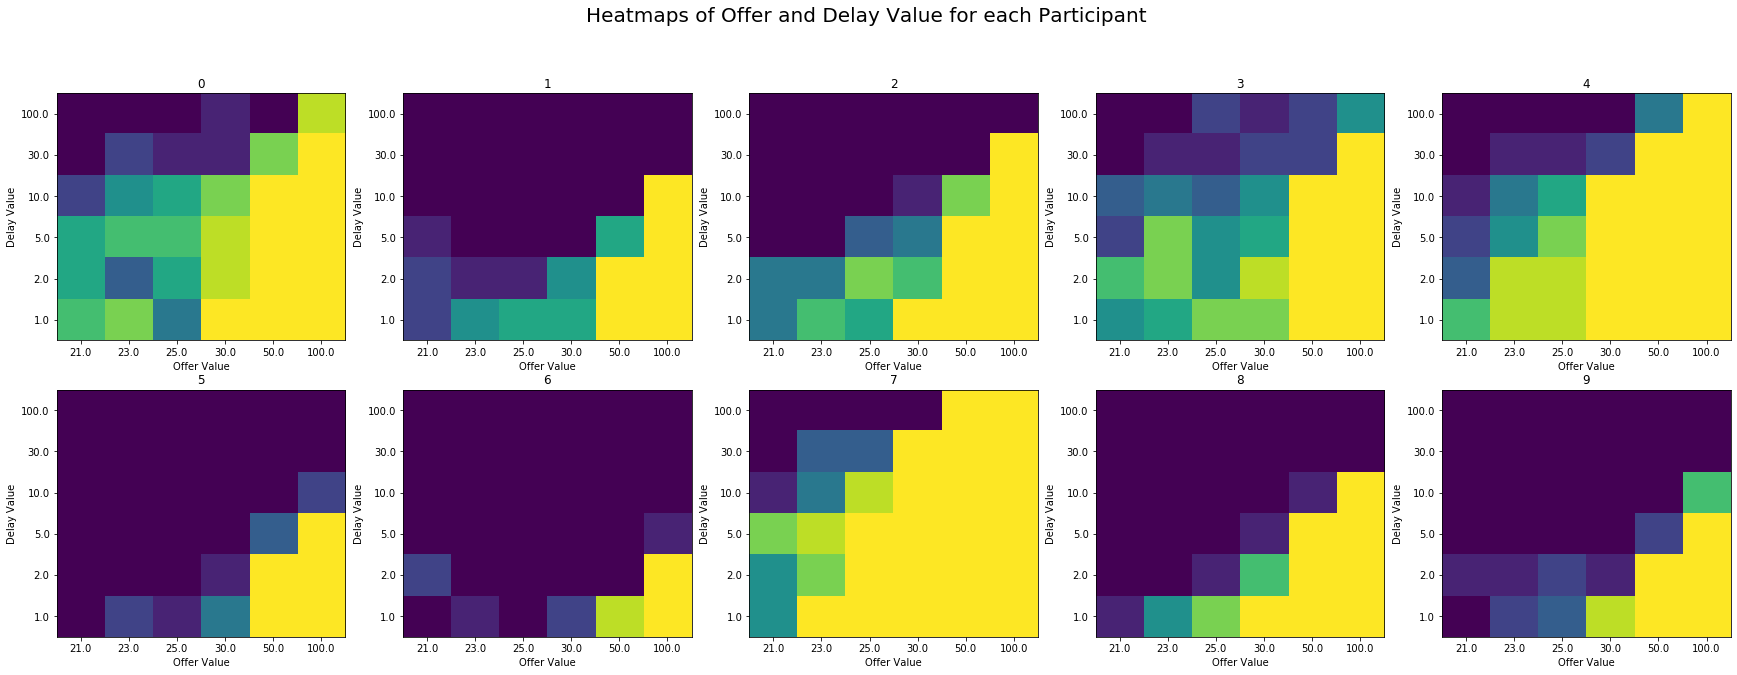

In [36]:
figure, axis = plt.subplots(2, 5, figsize=[30, 10])
plt.setp(axis, xticks=np.arange(0, 6), xticklabels=Vs,yticks=np.arange(0, 6), yticklabels=Ds[::-1])
figure.suptitle("Heatmaps of Offer and Delay Value for each Participant", y = 1.00, fontsize = 20)

# YOUR CODE HERE
first_index = 0
second_index = 0
count = -1
individual_behavior = []
for i in np.arange(0, len(choices), 36):
    offer_count = 0
    delay_count = -1
    curr_matrix = np.zeros((6,6))
    count += 1
    for j in np.arange(i, i+36):
        delay_count += 1
        if delay_count == 6 and offer_count == 5:
            offer_count = 0
            delay_count = 0
        if delay_count == 6 and offer_count != 5:
            offer_count += 1
            delay_count = 0
        curr_matrix[offer_count][delay_count] += sum(choices[j])
    individual_behavior.append(curr_matrix)
    curr_matrix = curr_matrix / 10
    
    if second_index == 5:
        first_index = 1
        second_index = 0
    curr_axis = axis[first_index][second_index]
    curr_axis.imshow(curr_matrix.T[::-1], aspect = "auto")
    curr_axis.set_xlabel("Offer Value")
    curr_axis.set_ylabel("Delay Value")
    curr_axis.set_title(str(count))
    second_index += 1
figure.savefig("PS11_Q1_2.png")


## Q1.3. Individual differences. [SOLO, 3pts]

<div class="alert alert-success">

<li>Compare subject 4 and subject 6. How are they different?</li>
<li>Compare subject 1 and subject 8. How are they different? </li>

</div>



Subject 4 attempted many more offers than Subject 6, not just those centered around higher offer values. Subject 4 attempted more choices with lowered delay time, even though the offer value was low, doing so about half/less than half the time for choices with delay less than 5. Subject 6 tended to have choices that were only in the higher offer value region, with few outliers. Subject 6 did not make choices in the lowest offer region at all, did not make many choices in the subsequent offer regions(23, 25) even with the lowest delay time. Even at 30, Subject 6 attempted less than half with low delay time, which is a stark difference to Subject 4, who picked choices in the lower offer regions, when the delay time tended to be low. 


## Q2. Modeling the data

We will use a hyperbolic discount model to model the data. As a reminder, the model assumes that the non-delayed offer of $V_0 =20$ is compared to a subjective value offer of $V_1 = \frac{V}{1+k \dot D}$.

Then, we assume that participants choose between delay (1) or no delay (0) according to a softmax choice rule: $P(delay) = \frac{1}{1+exp(-\beta \cdot (V_1 - V_0))}$. This formula gives you the likelihood of an observed choice given A) the chosen model, B) the offer value V and the delay D, as well as C) parameters $k$ (discount factor) and $\beta$ (noise parameter). To avoid numerical issues where the probability is $0$, **we will use a slightly modified version of the original equation**: 

$$P(delay) = \frac{\epsilon}{2} + (1-\epsilon)\frac{1}{1+exp(-\beta \cdot(V_1 - V_0))},$$ 

where $\epsilon = .0001$ is a very small value preventing 0 or 1 probabilities.


### Q2.1 Hyperbolic time discount likelihood [HELP, 5]
<div class="alert alert-success">

Write a function called `likelihood_one_choice` that takes an observed choice C (0 or 1), an 1 × 2 offer vector ([V, D]), and a 1 × 2 parameter vector ([k, beta]), and returns the likelihood of choice C. Your function should first compute the subjective value of the new offer and then use it to compute the probability of the choice. 

</div>

When you think your function is correct, run the next cell to plot the likelihood for multiple values of k, and upload your figure in Gradescope as `PS11_Q2_1.png`.

In [37]:
def likelihood_one_choice(C, offer, parameters):
    """
    Returns the likelihood of choice C give C, the offer ([V, D]), 
    and parameters ([k, beta]) in the softmax choice model.
    
    Parameters
    ----------
    
    C: integer
        Observed choice (either 0 or 1)
    offer : NumPy array of shape (2,)
        Combination of offer value and delay 
    parameters: NumPy array of shape (2,)
        Parameter values in the softmax function 
 
    Returns
    -------
    a float corresponding to the probability of C 

    """

    V = offer[0]
    D = offer[1]
    k = parameters[0]
    beta = parameters[1]
    eps = 0.0001

    # YOUR CODE HERE
    V_1 = V/(1 + k*D)
    V_0 = 20
    p_c_1 = eps/2 + (1-eps)*(1/(1 + np.exp(-beta * (V_1 - V_0))))
    if C == 0:
        return 1 - p_c_1
    else:
        return p_c_1

In [38]:
# Add your own test cases

In [39]:
"""Check if likelihood_one_choice computes the correct values"""
from numpy.testing import assert_allclose

assert_allclose(likelihood_one_choice(1, np.array([100, 1]), np.array([1, 0])), 0.5)
assert_allclose(
    likelihood_one_choice(1, np.array([100, 1]), np.array([1, 1])), 0.9999499999999065
)
assert_allclose(
    likelihood_one_choice(0, np.array([100, 1]), np.array([1, 1])),
    5.000000009347527e-05,
)
assert_allclose(
    likelihood_one_choice(1, np.array([60, 30]), np.array([0.1, 0.5])),
    0.07590059420324143,
)

print("Success!")

Success!


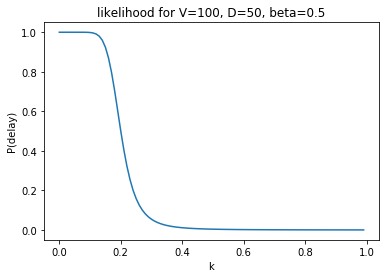

In [40]:
# Plot for Q3.1
offer = np.array([100, 20])
beta = 0.5

ks = np.arange(0, 1, 0.01)
ls = np.empty(len(ks))

for i, k in enumerate(ks):
    ls[i] = likelihood_one_choice(1, offer, np.array([k, beta]))


figure, axis = plt.subplots()
axis.plot(ks, ls)
axis.set_xlabel("k")
axis.set_ylabel("P(delay)")
axis.set_title("likelihood for V=100, D=50, beta=0.5")

figure.savefig("PS11_Q2_1.png")


### Q2.2 Hyperbolic time discount likelihood - multiple trials [SOLO, 2pts]
<div class="alert alert-success">

Write a function called `log_likelihood_choice` that takes an n × 10 array of observed choices, an n × 2 offer array, and a 1 × 2 parameter vector ([k, beta]), and returns the log-likelihood of the given sequence of n × 10 choices. We assume that all choices are independent from each other such that the log-likelihood of the sequence is equal to the sum of the log-likelihood of each choice independently.

</div>

When you think your function is correct, run the next cell to plot the log-likelihood for multiple values of $\beta$, and upload your figure in Gradescope as `PS11_Q2_2.png`.

In [41]:
def log_likelihood_choices(choices, offers, parameters):   
    """
    Returns the log-likelihood of the sequence of choices, given an array of choices, 
    an array of corresponding offers, and parameters ([k, beta]) in the softmax choice model.
    
    Parameters
    ----------
    
    choices: NumPy array of shape (n, 10)
        A sequence of choices made by participants
    offer: NumPy array of shape (n, 2)
        A sequence of offers upon which choices were based
    parameters: NumPy array of shape (2,)
        Parameter values in the softmax function 
 
    Returns
    -------
    a float corresponding to the log-likelihood of the given sequence of choices 

    """

    #YOUR CODE HERE
    log_sum = 0
    for i in np.arange(0, len(choices)):
        for j in np.arange(0, 10):
            log_sum += np.log(likelihood_one_choice(choices[i][j], offers[i], parameters))
    return log_sum

In [42]:
# Add your own test cases here

In [43]:
from numpy.testing import assert_allclose

data = np.load("TimeDiscountExperiment.npz")
offers = data["offers"]
choices = data["choices"]


assert_allclose(
    log_likelihood_choices(choices, offers, np.array([0, 0.5])), -8217.927553085532
)
assert_allclose(
    log_likelihood_choices(choices, offers, np.array([0, 0])), -2495.329850015794
)
assert_allclose(
    log_likelihood_choices(choices, offers, np.array([0.2, 0.1])), -1663.772256824346
)


print("Success!")

Success!


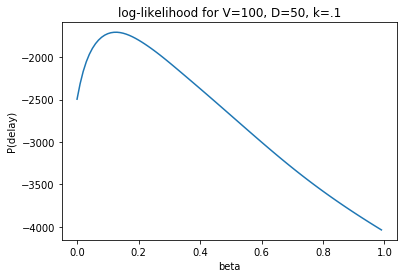

In [44]:
k = 0.1

bs = np.arange(0, 1, 0.01)
ls = np.empty(len(bs))

for i, b in enumerate(bs):
    ls[i] = log_likelihood_choices(choices, offers, np.array([k, b]))


figure, axis = plt.subplots()
axis.plot(bs, ls)
axis.set_xlabel("beta")
axis.set_ylabel("P(delay)")
axis.set_title("log-likelihood for V=100, D=50, k=.1")

figure.savefig("PS11_Q2_2.png")

## Q3 Fitting the parameters

Now, we are going to use this likelihood function to find the parameters that best fit each participant's choice data.

### Q3.1 Maximum likelihood [HELP, 5 points]
<div class="alert alert-success">

We are going to use [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search_2) to find the $k$ and the $\beta$ values that maximize each participant's log-likelihood of choices. The "grid" consists of exhaustive combinations of possible $k$ and $\beta$ values, which you can use the provided incements `ks` and `bs` to generate.
    
1. In 10 subplots (one per participant), plot the log-likelihood as a heatmap where the x-axis is $\beta$ and the y-axis is $k$. 
    
2. Apart from generating the heatmaps, in each subplot, you must also find the $k$ and the $\beta$ values that provide the maximium log-likelihood and then use a red dot to mark this position on that heatmap. Upload your figure in Gradescope as `PS11_Q3_1.png`.
    
You **MUST** follow the plotting instructions below to get full credit:    
- Use (30, 10) as your global figure size (`figsize=[30, 10]`)
- Arrange 10 subplots in a 2 (rows) $\times$ 5 (columns) grid
- Title each subplot using the corresponding participant ID (i.e., "0", "1", etc.)
- Label all x- and y-axes in the subplots and title your global figure 
    
2. Please store the maximum positions of $\beta$ as a 1D array `map_b` and the maximum positions of $k$ as another 1D array `map_k`.
</div>

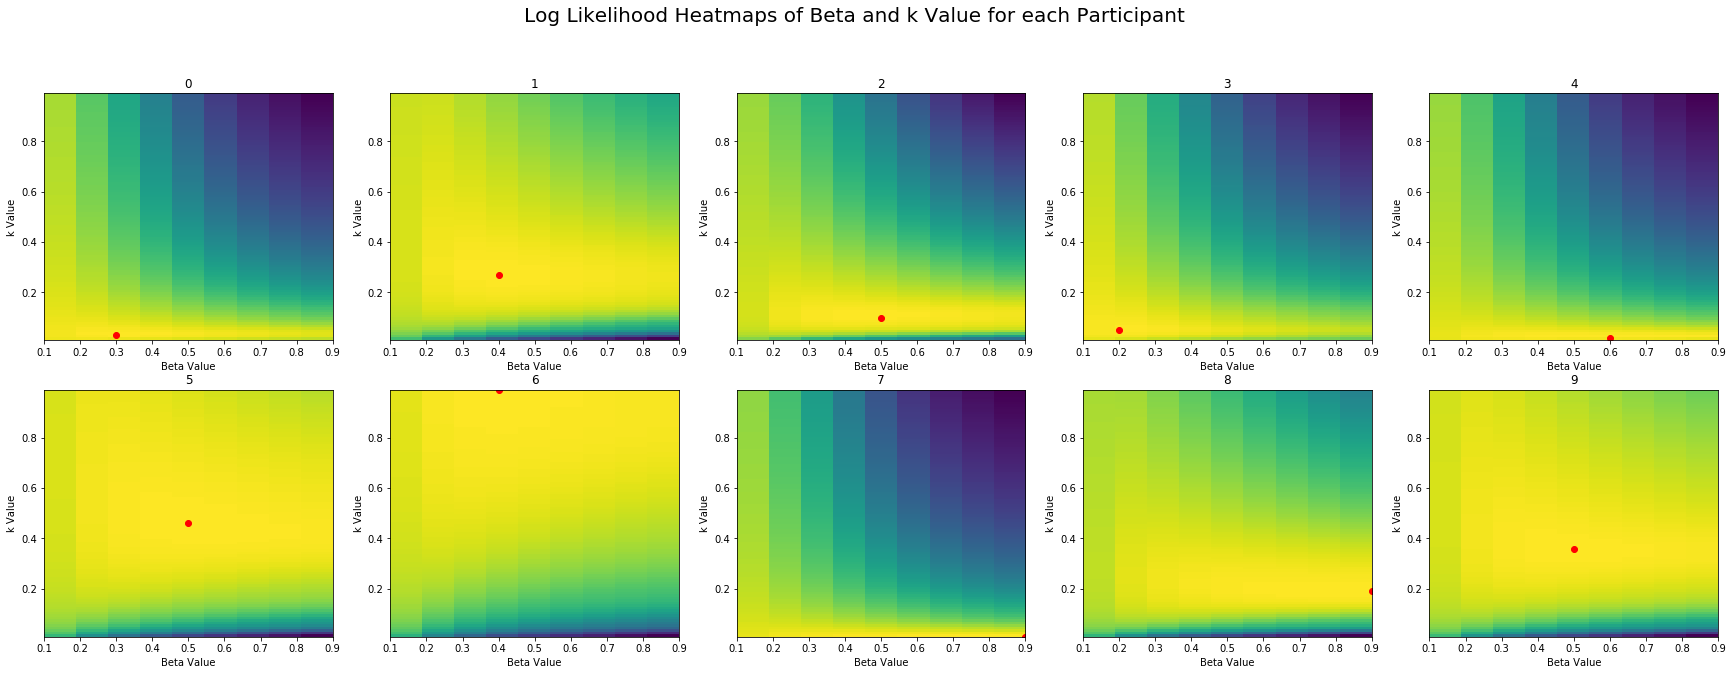

In [45]:
ks = np.arange(0.01, 1, 0.01)
bs = np.arange(0.1, 1, 0.1)

figure, axis = plt.subplots(2, 5, figsize=[30, 10])
figure.suptitle("Log Likelihood Heatmaps of Beta and k Value for each Participant", y = 1.00, fontsize = 20)
# YOUR CODE HERE
log_likelihoods = []
map_b = np.array([])
map_k = np.array([])
first_index = 0
second_index = 0
count = -1
for i in np.arange(0, len(choices), 36):
    curr_choices = choices[i:i+36]
    curr_likelihoods = []
    curr_k_b = []
    curr_matrix = np.zeros((len(bs),len(ks)))
    count += 1
    for k in np.arange(0, len(bs)):
        for j in np.arange(0, len(ks)):
            parameters = np.array([ks[j],bs[k]])
            curr_log_likelihood = log_likelihood_choices(curr_choices, offers[0:36], parameters)
            curr_likelihoods.append(curr_log_likelihood)
            curr_matrix[k][j] = curr_log_likelihood
            curr_k_b.append(parameters)
            
    curr_max_index = np.argmax(curr_likelihoods)
    curr_max = curr_likelihoods[curr_max_index]
    map_b = np.append(map_b, curr_k_b[curr_max_index][1])
    map_k = np.append(map_k, curr_k_b[curr_max_index][0])
    if second_index == 5:
        first_index = 1
        second_index = 0
    curr_axis = axis[first_index][second_index]
    curr_axis.imshow(curr_matrix.T[::-1], aspect = "auto", extent=[0.1,0.9,0.01,0.99])
    curr_axis.plot(curr_k_b[curr_max_index][1], curr_k_b[curr_max_index][0], color="r", marker = 'o')
    curr_axis.set_xlabel("Beta Value")
    curr_axis.set_ylabel("k Value")
    curr_axis.set_title(str(count))
    second_index += 1
    
figure.savefig("PS11_Q3_1.png")

### Q3.2 Maximum likelihood [SOLO, 5 points]
<div class="alert alert-success">

The data we provided to you is not real participant data but simulated data. The true $k$ and $\beta$ values for each participant are provided below. In two subplots (one per parameter), you will plot the maximum likelihood estimates (MLEs) of each parameter (x-axis) against their true values (y-axis). One subplot will be comparing MLEs of $\beta$ against actual $\beta$ values and the other comparing MLEs of $k$ against actual $k$ values.
    
You **MUST** follow the plotting instructions below to get full credit:    
- Use (10, 5) as your global figure size (`figsize=[10, 5]`)
- Arrange the 2 subplots in one row: $\beta$ on the left and $k$ on the right 
- Title each subplot using the corresponding parameter name (i.e., "beta", "k")
- Label all x- and y-axes in the subplots and title your global figure 
- Add a unity line ($y=x$) in each subplot
  
1. Upload your figure in Gradescope as `PS11_Q3_2.png`. 
2. How well did you recover the true parameters? Write one or two sentences to comment on the results.
</div>



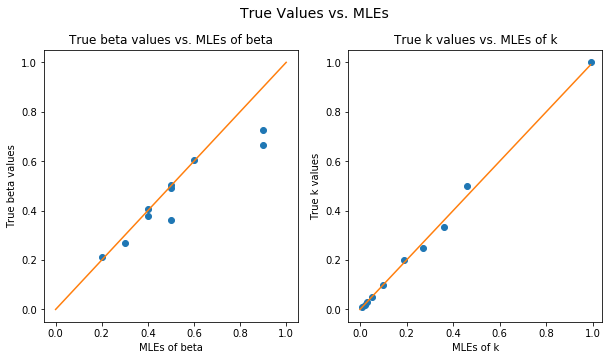

In [46]:
true_k = data["true_k"]
true_beta = data["true_beta"]

# YOUR CODE HERE
figure, axis = plt.subplots(1, 2, figsize = [10, 5])
figure.suptitle("True Values vs. MLEs", y = 1.00, fontsize = 14)
axis_1 = axis[0]
axis_1.plot(map_b, true_beta, linestyle = '', marker = 'o')
axis_1.set_xlabel("MLEs of beta")
axis_1.set_ylabel("True beta values")
axis_1.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
axis_1.set_title("True beta values vs. MLEs of beta")

axis_2 = axis[1]
axis_2.plot(map_k, true_k, linestyle = '', marker = 'o')
axis_2.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
axis_2.set_xlabel("MLEs of k")
axis_2.set_ylabel("True k values")
axis_2.set_title("True k values vs. MLEs of k")

figure.savefig("PS11_Q3_2.png")

# Q4 Simulating the model


### Q4.1 Simulating the model. [SOLO, 5pts]

Now, we want to simulate people's choices using the model with fitted parameters to 1) see how well the simulation matches the actual data and 2) make predictions for different offer or delay values. You will reuse your `likelihood_one_choice` function in the simulation.

<div class="alert alert-success">
    
In Q1.2, you saved each participant's aggregate data in a list called <code>individual_behavior</code>. Recall that each element in this list is a 6 × 6 array storing each participant's $P(delay|V,D)$ given each combination of V and D. In Q3.1, you saved each participant's estimated $k$ value in `map_k` and estimated $\beta$ value in `map_b`. You will be using these data to generate a figure with 10 subplots (one per participant).
    
1. In each subplot, for each offer value V (<b>as a separate line!</b>), plot the model's predicted likelihood of accepting the delayed offer as a function of delay (please use increments of 1 ranging from 0 to 100 for delay). 
    
2. Then on top of these lines, for each offer (<b>use the same color as the corresponding line to mark the dots</b>), plot each participant's $P(delay|V,D)$ as a function of delay (please use the actual delay values, which takes one of 6 discrete values in `Ds`). 
    
If you do it right, the lines in #1 should be very close to the corresponding data points in #2.

You **MUST** follow the plotting instructions below to get full credit:    
- Use (30, 10) as your global figure size (`figsize=[30, 10]`)
- Arrange 10 subplots in a 2 (rows) $\times$ 5 (columns) grid
- Title each subplot using the corresponding participant ID (i.e., "0", "1", etc.)
- Label all x- and y-axes in the subplots and title your global figure 
- Include a legend for each offer value in the subplots
- Make sure you use the same color scheme for your lines in #1 and the dots in #2 (e.g., when $V = 21$, if the line in #1 is blue, then the dots in #2 should also be blue)

Upload your figure in Gradescope as `PS11_Q4_1.png`.     
</div>

In [47]:
individual_behvaior = np.array(individual_behavior) / 10

[0.9997590306870043, 0.9996616489287266, 0.9995243927712844, 0.9993348058155455, 0.9990777643846054, 0.9987352051530918, 0.9982858817759319, 0.9977051616959207, 0.9969648745800227, 0.9960332239641784, 0.994874773644318, 0.9934505200792908, 0.9917180614858591, 0.9896318733024211, 0.9871436981602512, 0.9842030563124942, 0.9807578795316126, 0.9767552677297278, 0.9721423629724336, 0.9668673302091347, 0.9608804280876215, 0.9541351469162006, 0.9465893845461818, 0.9382066251264147, 0.928957080851116, 0.9188187535270245, 0.9077783715377618, 0.8958321589968616, 0.8829863978087004, 0.8692577500331827, 0.8546733171565232, 0.8392704241270433, 0.8230961286076911, 0.8062064689387126, 0.7886654768220142, 0.7705439917801123, 0.7519183231789365, 0.7328688114225506, 0.71347834249463, 0.6938308693051938, 0.6740099895603878, 0.6540976236082726, 0.6341728275930865, 0.6143107680259849, 0.5945818743021395, 0.5750511764392281, 0.5557778269314164, 0.5368147985005629, 0.5182087439135915, 0.5, 0.4822227154961537

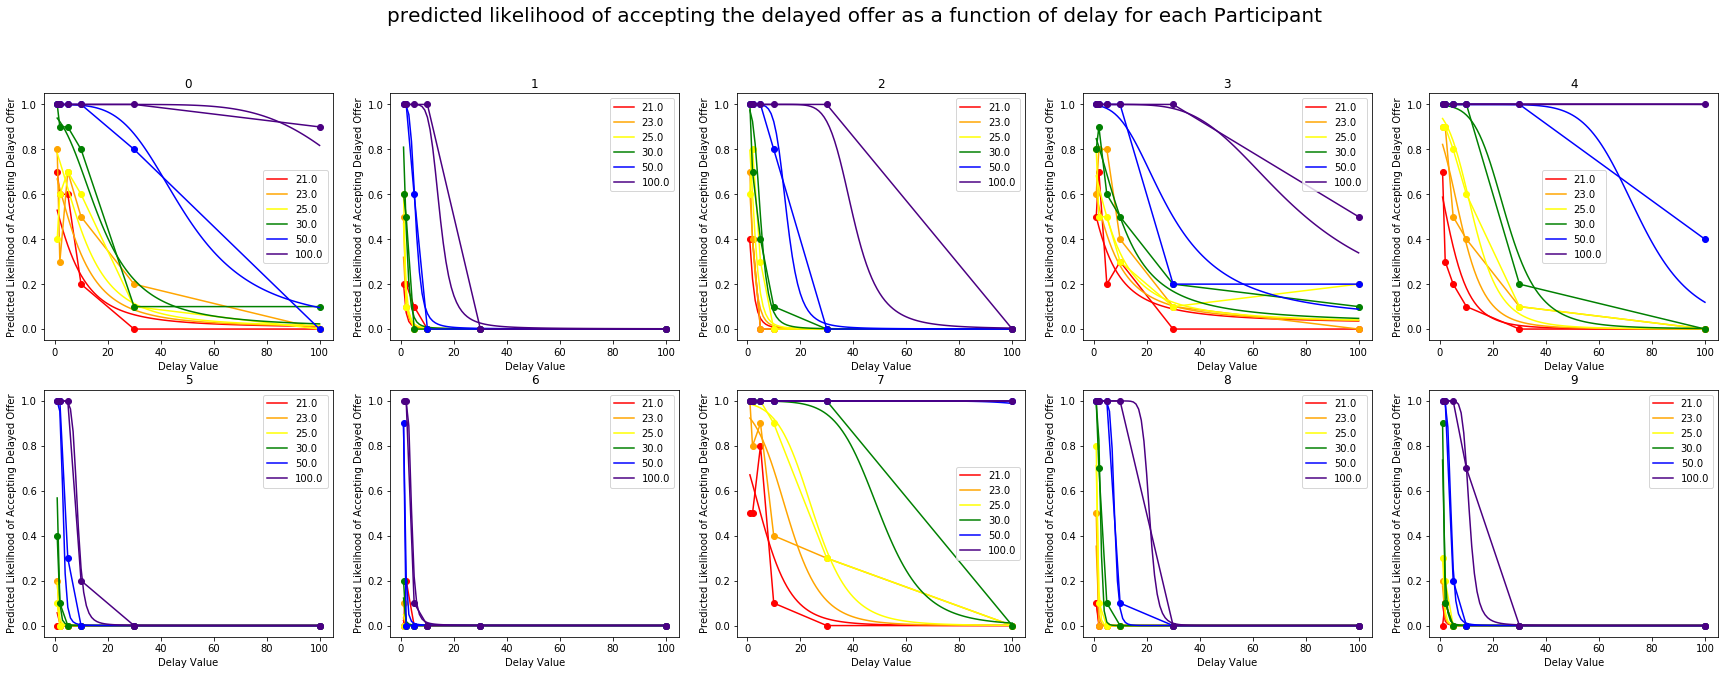

In [48]:
Vs = np.unique(offers[:, 0])
Dline = np.arange(min(Ds), max(Ds) + 1)
Nd = len(Dline)

# YOUR CODE HERE
figure, axis = plt.subplots(2, 5, figsize=[30, 10])
figure.suptitle("predicted likelihood of accepting the delayed offer as a function of delay for each Participant", y = 1.00, fontsize = 20)
first_index = 0
second_index = 0
individual_behavior = np.array(individual_behavior) / 10
colors = ["red", "orange", "yellow", "green", "blue", "indigo"]
for i in np.arange(0, 10):
    curr_axis = axis[first_index][second_index]
    for j in np.arange(0, len(Vs)):
        curr_likelihoods = []
        curr_delay = []
        for k in np.arange(0, len(Dline)):
            curr_likelihoods.append(likelihood_one_choice(1, np.array([Vs[j], Dline[k]]), np.array([map_k[i], map_b[i]])))
        for h in np.arange(0, len(Ds)):
            curr_delay.append(individual_behavior[i][j][h])
        if j == 4:
            print(curr_likelihoods)
            for l in np.arange(0, len(curr_likelihoods)):
                if curr_likelihoods[l] <= 0.5:
                    print(l)
        curr_axis.plot(Dline, curr_likelihoods, color = colors[j], label = Vs[j])
        curr_axis.plot(Ds, curr_delay, color = colors[j], marker = 'o')
        curr_axis.set_xlabel("Delay Value")
        curr_axis.set_ylabel("Predicted Likelihood of Accepting Delayed Offer")
        curr_axis.set_title(i)
    curr_axis.legend()
        
    second_index += 1
    if second_index == 5:
        first_index = 1
        second_index = 0
figure.savefig("PS11_Q4_1.png")


### Q4.2 Interpretation. [SOLO, 3pts]

<div class="alert alert-success">
How well does the model capture the experiment data? In 2-3 sentences, explain where any observed differences might have come from.
</div>

### Q4.3 Prediction. [SOLO, 2pts]

<div class="alert alert-success">

Enter a single number in Gradescope for each question:
1. For participant 3 (index starts from 0), if I make a delayed offer of \$50, how long should the delay be so that they will be perfectly ambivalent between taking this delayed offer vs. \\$20 now? 
    30
2. What about participant 4? 
    
3. What about participant 5? 

</div>


---
<div style="background-color: #c1f2a5">

# Submission

When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS11.

- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="https://www.dropbox.com/s/7s189m4dsvu5j65/instruction.png?dl=1" width="300"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS5-code.
    
</div>        




</div>

</div>
